In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.8.1
astroid                       2.14.2
astropy                       5.1
asttokens    

In [4]:
import tensorflow as tf 
import os

2024-07-08 18:03:33.280398: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/var/folders/ws/j57wfkkx01z50lt5jhcsdk1m0000gn/T/ipykernel_38078/3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [17]:
data_dir = 'data'

In [18]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [24]:
os.remove('data/.DS_Store')

In [25]:
os.listdir(os.path.join(data_dir))

['healthy', 'unwell']

In [27]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

        


In [32]:
img = cv2.imread(os.path.join('data', 'healthy', '62b413b337ace7448b4592b8_Blog_2.png'))

In [33]:
img.shape

(600, 1200, 3)

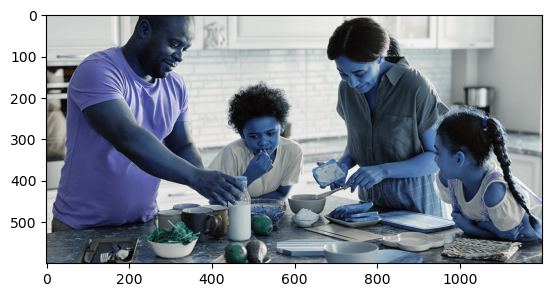

In [34]:
plt.imshow(img)

In [35]:
import numpy as np 
from matplotlib import pyplot as plt

In [36]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 240 files belonging to 2 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

In [39]:
batch[0].shape

(32, 256, 256, 3)

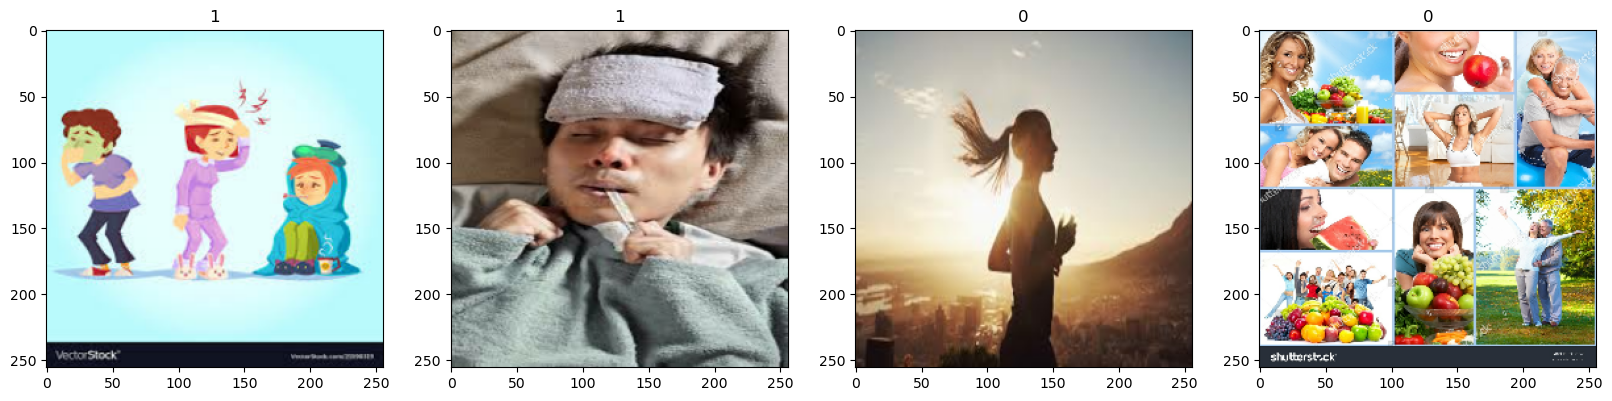

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
scaled_iterator = data.as_numpy_iterator()

In [43]:
batch = scaled_iterator.next()

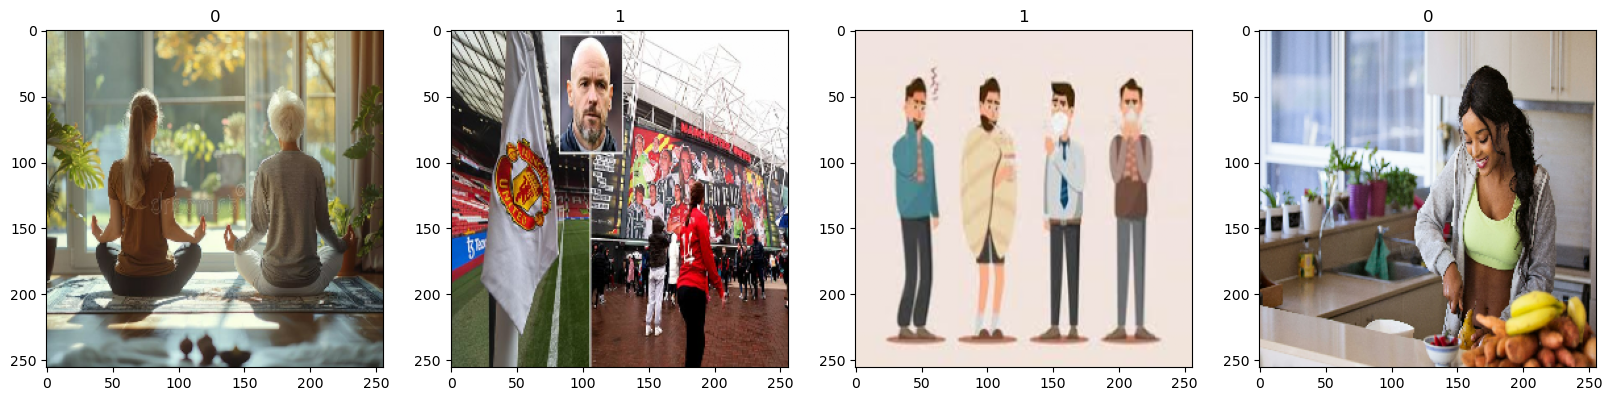

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [45]:
batch[0].max()

1.0

In [46]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [47]:
train_size

5

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/alexanderstevenson/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
logdir = 'logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5257 - loss: 1.8121 - val_accuracy: 0.5156 - val_loss: 0.7563
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3912 - loss: 0.8066 - val_accuracy: 0.5938 - val_loss: 0.6721
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5560 - loss: 0.6754 - val_accuracy: 0.6875 - val_loss: 0.6585
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 990ms/step - accuracy: 0.6480 - loss: 0.6650 - val_accuracy: 0.3906 - val_loss: 0.6964
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 970ms/step - accuracy: 0.5534 - loss: 0.6410 - val_accuracy: 0.6562 - val_loss: 0.6200
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 911ms/step - accuracy: 0.7178 - loss: 0.5823 - val_accuracy: 0.8125 - val_loss: 0.5034
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 924ms/step - accuracy: 0.7491 - loss: 0.5536 - val_accuracy: 0.7812 - val_loss: 0.4775
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 968ms/step - accuracy: 0.7818 - loss: 0.4928 - val_accuracy: 0.7812 - val_loss: 0.4350


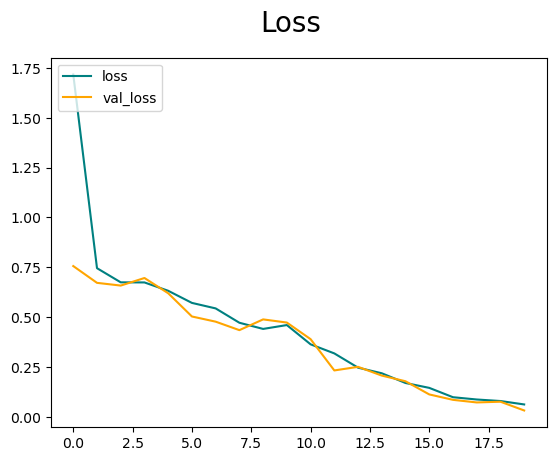

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

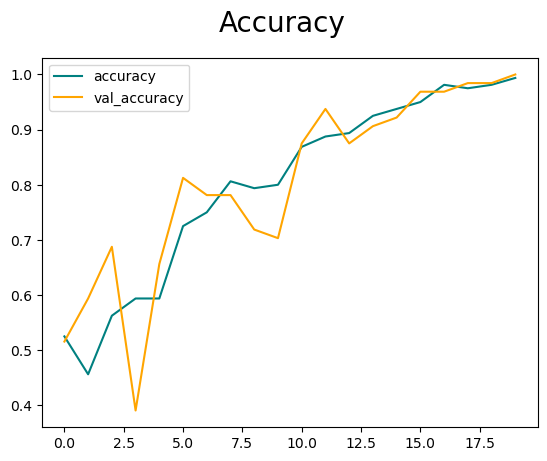

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color ='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [59]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [60]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [61]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [62]:
for batch in test.as_numpy_iterator(): 
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


2024-07-08 18:11:50.430355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [63]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [64]:
import cv2

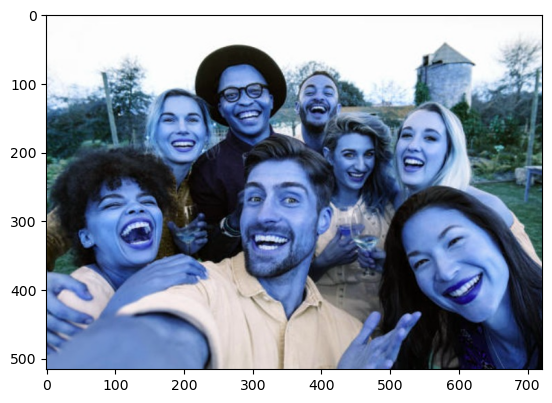

In [66]:
img = cv2.imread('data/happytest.jpeg')
plt.imshow(img)
plt.show()

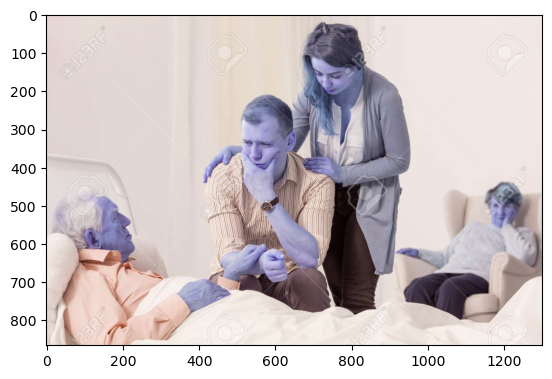

In [72]:
img2 = cv2.imread('data/sadtest.jpeg')
plt.imshow(img2)
plt.show()

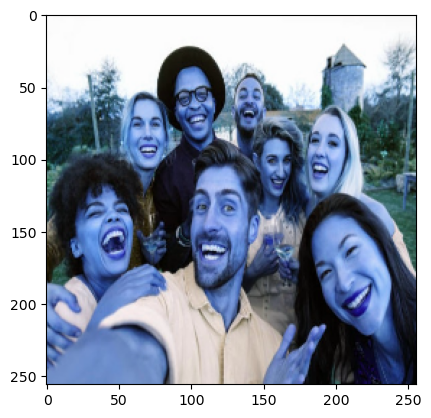

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

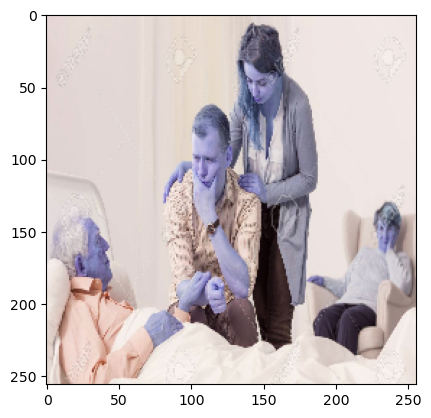

In [73]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [74]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
yhat2

array([[0.17948747]], dtype=float32)

In [75]:
if yhat2 < 0.5:
    print("The people are healthy")
else:
    print("The people are unwell")

The people are unwell


In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('models', 'imageclassifier.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [ ]:
img3 = cv2.imread('data/test.jpeg')
resize3 = tf.image.resize(img3, (256,256))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize3/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
yhatnew

array([[0.14356498]], dtype=float32)

In [ ]:
if yhatnew < 0.5:
    print("Image is sad")
else:
    print("image is happy")

Image is sad
